In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 从一组坐标系，转化为了第二组坐标系的过程
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size =100)
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0,10.,size=100)

In [4]:
# 第一步，先将样例的均值归为0
def demean(X):
    return X-np.mean(X,axis=0)

X = demean(X)

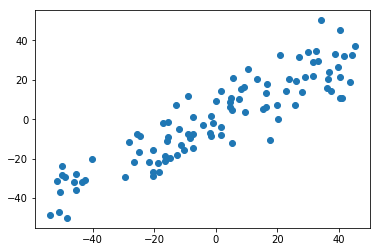

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [11]:
#求解第一主成分
# 求目标函数对应的梯度
def f(w,X):
    return np.sum((X.dot(w) ** 2))/len(X)
def df(w,X):
    return X.T.dot(X.dot(w)) * 2./len(X)
# 求向量的模
def direction(w):
    return w / np.linalg.norm(w)
# 梯度上升法
def first_component(X,initial_w,eta,n_iters = 1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X)-f(last_w,X)) < epsilon):
            break
        cur_iter += 1
    
    return w

In [12]:
# 第二步，首先初始化一个w的值，initial_w
initial_w = np.random.random(X.shape[1])
eta = 0.01
# 第三步，求解出第一主成分的单位方向
w = first_component(X,initial_w,eta)
w

array([0.79048729, 0.61247845])

# 求解第二主成分

In [13]:
# 第一步：将原始的数据中，对应于第一主成分相应的式子都去掉
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

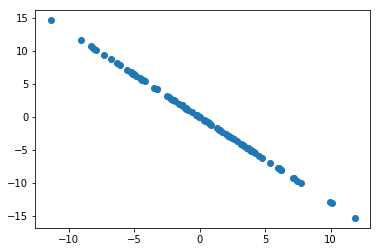

In [14]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [15]:
# 求第二主成分对应的w的值是多少
w2 = first_component(X2,initial_w,eta)
w2

array([-0.61247423,  0.79049056])

In [16]:
# 验证w和w2垂直,趋近于0
w.dot(w2)

5.341682894677291e-06

In [17]:
# 对求X2的操作的for循环改为向量化
X2 = X - X.dot(w).reshape(-1,1) * w 

In [19]:
# 将求解的第一第二主成分合并为一个函数
def first_n_components(n,X,eta = 0.01,n_iters =1e4,epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    
    res =[]
    
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
#         主成分的梯度值
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    return res

In [20]:
first_n_components(2,X)

[array([0.79048729, 0.61247845]), array([-0.61247586,  0.7904893 ])]

# 高维降维到低纬的主成分分析

In [21]:
import numpy as np


class PCA:

    def __init__(self, n_components):
        """初始化PCA"""
        assert n_components >= 1, "n_components must be valid"
        self.n_components = n_components
        self.components_ = None
    
    def fit(self, X, eta=0.01, n_iters=1e4):
        """获得数据集X的前n个主成分"""
        assert self.n_components <= X.shape[1], \
            "n_components must not be greater than the feature number of X"

        def demean(X):
            return X - np.mean(X, axis=0)

        def f(w, X):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def direction(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.01, n_iters=1e4, epsilon=1e-8):

            w = direction(initial_w)
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)
                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break

                cur_iter += 1

            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i,:] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

        return self

    def transform(self, X):
        """将给定的X，映射到各个主成分分量中"""
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        """将给定的X，反向映射回原来的特征空间"""
        assert X.shape[1] == self.components_.shape[0]

        return X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components

In [22]:
from playML.PCA import PCA

pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [23]:
pca.components_

array([[ 0.7904875 ,  0.61247817],
       [ 0.61248126, -0.79048511]])

In [24]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [25]:
X_reduction = pca.transform(X)

In [26]:
X_reduction.shape

(100, 1)

In [27]:
X_restore = pca.inverse_transform(X_reduction)

In [28]:
X_restore.shape

(100, 2)

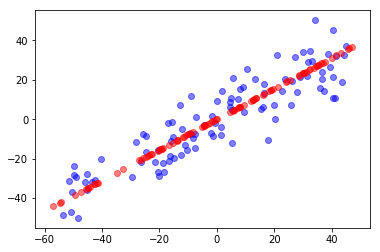

In [29]:
plt.scatter(X[:,0],X[:,1],color = 'b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha=0.5)
plt.show()

# Scikit-learn中的PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.components_

array([[-0.79048738, -0.61247833]])

In [33]:
X_reduction = pca.transform(X)

In [34]:
X_reduction.shape

(100, 1)

In [35]:
X_restore = pca.inverse_transform(X_reduction)

In [36]:
X_restore.shape

(100, 2)

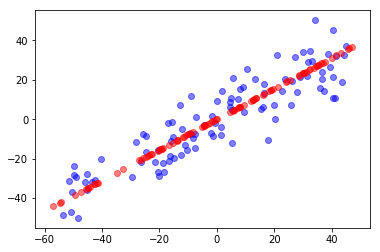

In [37]:
plt.scatter(X[:,0],X[:,1],color = 'b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha=0.5)
plt.show()

# scikit-learn中的pca的案例应用

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [6]:
X_train.shape

(1347, 64)

In [7]:
%%time 

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

Wall time: 12 ms


In [8]:
knn_clf.score(X_test,y_test)

0.9888888888888889

In [9]:
# 使用pca进行降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [10]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

Wall time: 998 µs


In [11]:
knn_clf.score(X_test_reduction,y_test)

0.62

In [12]:
# 使用指标来得出PCA中的超参数的求解
# 解释的方差的比例28%
# 通过这个变量来找到我们应该将我们的数据降低到多少维
pca.explained_variance_ratio_

array([0.15134375, 0.13542133])

In [13]:
pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.51343747e-01, 1.35421335e-01, 1.18018164e-01, 8.40076916e-02,
       5.59578027e-02, 4.84568854e-02, 4.35833542e-02, 3.58494284e-02,
       3.47176199e-02, 3.05706428e-02, 2.42610636e-02, 2.35250018e-02,
       1.78497940e-02, 1.76262035e-02, 1.46791685e-02, 1.39900698e-02,
       1.32340546e-02, 1.28121247e-02, 1.02642449e-02, 9.15808676e-03,
       8.66662617e-03, 7.86213946e-03, 7.48243916e-03, 7.19632034e-03,
       7.05969860e-03, 5.89783060e-03, 5.71656029e-03, 5.36287326e-03,
       4.89115672e-03, 4.21494956e-03, 3.68759494e-03, 3.56386112e-03,
       3.42204230e-03, 3.24294732e-03, 2.96691073e-03, 2.86340006e-03,
       2.48783778e-03, 2.31455428e-03, 2.18372833e-03, 2.00382704e-03,
       1.92334854e-03, 1.51603704e-03, 1.47639349e-03, 1.41274029e-03,
       1.19953660e-03, 1.09227637e-03, 9.47260025e-04, 7.68374439e-04,
       5.27622946e-04, 3.63235748e-04, 1.24482688e-04, 7.98418821e-05,
       5.33121640e-05, 4.11238626e-05, 3.66297186e-05, 1.48680572e-05,
      

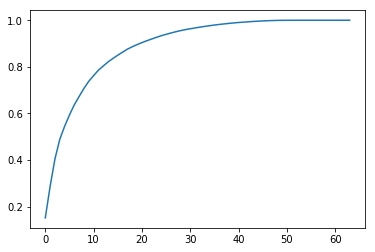

In [14]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range (X_train.shape[1])])
plt.show()

In [15]:
# 我不知道我取几个主成分，但是我需要保证取完的主成分占据95%以上的方差 
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.n_components_

28

In [17]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [18]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

Wall time: 2.96 ms


In [19]:
knn_clf.score(X_test_reduction,y_test)

0.9844444444444445

In [20]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [21]:
X_reduction.shape

(1797, 2)

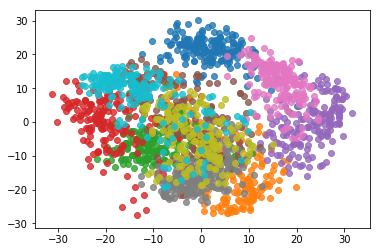

In [22]:
# 对两纬的数据进行绘制
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)
plt.show()

# MNIST数据集处理

In [23]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [33]:
mnist = fetch_mldata("MNIST original")

TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

In [ ]:
mnist

In [ ]:
X,y = minist['data'],mnist['target']

In [25]:
X.shape

(1797, 64)

In [27]:
X_train = np.array(X[:60000],dtype=float)
y_train = np.array(y[:60000],dtype=float)
X_test = np.array(X[60000:],dtype=float)
y_test = np.array(y[60000:],dtype=float)

In [28]:
X_train.shape

(1797, 64)

In [29]:
y_train.shape

(1797,)

In [30]:
X_test.shape

(0, 64)

In [32]:
y_test.shape

(0,)

In [34]:
# 使用KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train,y_train)

Wall time: 15 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
%time knn_clf.score(X_test,y_test)

# PCA进行降维

In [38]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [39]:
X_train_reduction.shape

(1797, 21)

In [40]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction,y_train)

Wall time: 2.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# 使用PCA降噪

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

In [43]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,5,size=100)

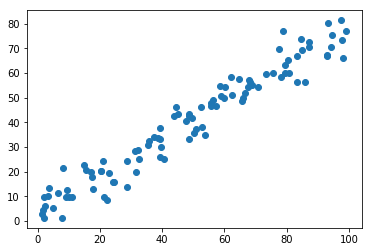

In [44]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# 手写识别的例子

In [45]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [46]:
noisy_digits = X + np.random.normal(0,4,size=X.shape)

In [48]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits,X_num])

In [49]:
example_digits.shape

(100, 64)

In [ ]:
def plot_digits(data):
    fig,